Alejandra Duque Maldonado
# Assignment 1 

The following program aims to open and read a book obtained from Project Gutengerb, in this case "Alice in Wonderland" by Lewis Carroll, and count the frequency of each word in the text. 

Prior to running the program, we need to load the libraries that will be used for this task. To perform the linguistic analysis we will first need to add the NLTK library and some of its packages, which will allow us to tokenize the text and obtain a frequency distribution. Additionally, we include the string corpus to extract punctuation symbols. Lastly, we will make use of the numpy and matplotlib libraries to visualize Zipf's law. 

In [1]:
import nltk
from nltk import word_tokenize
import string
from nltk.probability import FreqDist
import numpy as np 
import matplotlib.pyplot as plt

The first step of this program is to open and read the book previously downloaded from the Project Gutenberg website. The book we need is located in the zip folder of this assignment as a .txt file. The following line locates and reads the file, encoding the text in UTF-8 so it can be correctly interpreted.

In [2]:
book= open("alice.txt", "r", encoding= "utf-8").read()

Once we have the raw text from the file, we need to separate this data into segments, which means divide the text into words. To do this we will use the word tokenizer from NLTK. Additionally, to ensure the whole text is uniform and all the words will be equally interpreted by the program, we will need to normalize the text, for this we will use the .lower() function to transform all of the words into lower case characters. 

In [3]:
tokens_alice= word_tokenize(book)
lower_alice=[w.lower() for w in tokens_alice]

In this block, we will exclude noisy characters, as it is punctuation, from our data. This way we will work uniquely with the words from the book. 

In [4]:
punctuation= string.punctuation #String with list of punctuation
excluded_signs= ["’", "“", "”","‘"] #List of all of the signs that are not included in the predefined string
clean_alice= [w for w in lower_alice if w not in punctuation and w not in excluded_signs] #Excludes punctuation

Here we can see a list of the first 30 words in the book.

In [5]:
print(clean_alice[:30])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'alice', "'s", 'adventures', 'in', 'wonderland', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world']


The NLTK tool has a function we can use to get a frequency distribution of the words in a text (https://www.nltk.org/api/nltk.probability.FreqDist.html). The output is an NLTK object containing a dictionary that consists of a key (word) and a value (frequency).

In [7]:
word_distribution= FreqDist(clean_alice)
word_distribution 

FreqDist({'the': 1824, 'and': 911, 'to': 801, 'a': 688, 'of': 631, 'it': 591, 'she': 546, 'i': 512, 'you': 463, 'said': 457, ...})

For observation purposes, in the line below we can see how the words with the highest frequency tend to be the shortest forms of words and the ones that carry less semantic meaning, i.e. articles, pronouns, prepositions... Whereas, the words with lowest frequency tend to be semantically meaningful, as it can be verbs, nouns, adverbs, etc. (See least frequent word list below)

In [25]:
print(f'Most frequent words: {word_distribution.most_common(15)}')
least_frequent_words = word_distribution.most_common()[:-15:-1] #Least frequent words 
print('\n')
print(f'Least frequent words: {least_frequent_words}')


Most frequent words: [('the', 1824), ('and', 911), ('to', 801), ('a', 688), ('of', 631), ('it', 591), ('she', 546), ('i', 512), ('you', 463), ('said', 457), ('in', 429), ('alice', 402), ('was', 353), ('that', 308), ('as', 271)]


Least frequent words: [('newsletter', 1), ('subscribe', 1), ('produce', 1), ('includes', 1), ('facility', 1), ('pg', 1), ('main', 1), ('necessarily', 1), ('thus', 1), ('confirmed', 1), ('volunteer', 1), ('network', 1), ('forty', 1), ('library', 1)]


Word distribution is mathematically simple and obeys Zipf's law. An empirical law that approximates the word frequency in terms of its rank. This law shows a pattern in the frequency of words, as we can see the frequency of use of a word is proportional to 1 over its rank. That is, the most frequent word  has a frequency proportional to 1, the second most frequent word has a frequency proportional to 1/2α, the third most frequent word has a frequency proportional to 1/3α and so on. Further information on Zipft's law: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4176592/

To plot the Zipf's law, since our previous results is an NLTK object, we will use the "dict" function to transform this object into a Python dictionary and manipulate the data. For this we will use the code below, which converts the object into a sorted dictionary (descending order) and then uses a loop to retrieve the word frequency from the sorted dictionary.

In [9]:
sorted_dict = dict(sorted(word_distribution.items(), key=lambda item: item[1], reverse=True)) #sorted dictionary
freq_list = []
for word, frequency in list(sorted_dict.items()):
    freq_list.append(frequency)

This list is them converted into a numpy array and arranged from 1 to n values. From here, we plot the Zipf's law with the frequencies of our corpus following the Zipf's law parameters:


Highest frequency / r^(log(Highest frequency)/log(Highest rank))


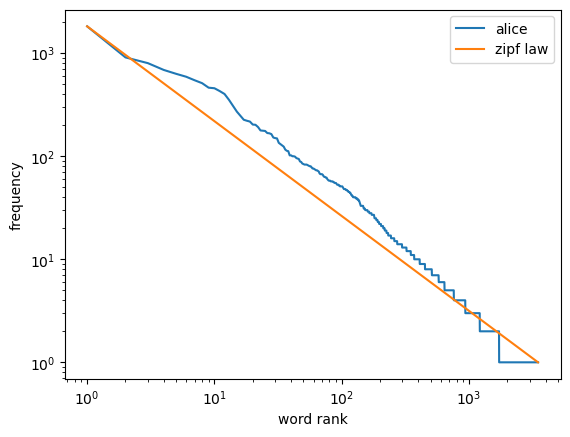

In [17]:
freq_list = np.asarray(freq_list) 
n = np.arange(freq_list.shape[0])+1 
y = freq_list[0]/(np.power(n, np.log(freq_list[0])/np.log(freq_list.shape[0]))) 

plt.plot(n, freq_list, label='alice')
plt.loglog(n, y, label='zipf law')
plt.legend()
plt.xlabel('word rank')
plt.ylabel('frequency')
plt.show()